In [35]:
from IPython.core.debugger import set_trace
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from matplotlib import pyplot

plt.style.use(style="seaborn")
%matplotlib inline

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/nsethi4310/CoffeeMLProject3/main/Resources/Coffee_Price_Data%20.csv")

In [37]:
df.head(5)

,Date,ICO Composite Price,Colombian\n Milds,Other Milds,Brazilian\n Naturals,Robustas
0,01/01/1990,62.75,82.07,76.02,70.36,49.47
1,02/01/1990,67.01,91.55,83.95,77.59,50.06
2,03/01/1990,75.25,103.24,94.73,86.17,55.76
3,04/01/1990,75.34,101.79,94.71,87.45,55.95
4,05/01/1990,73.30,99.14,92.97,86.31,53.62


In [38]:
df = df[["ICO Composite Price"]].copy()

In [39]:
df.head(5)

,ICO Composite Price
0,62.75
1,67.01
2,75.25
3,75.34
4,73.30


#### Transform this to a supervised learning problem.

In [40]:
df["target"] = df['ICO Composite Price'].shift(-1)

In [41]:
df.dropna(inplace=True)

In [42]:
df.head(5)

,ICO Composite Price,target
0,62.75,67.01
1,67.01,75.25
2,75.25,75.34
3,75.34,73.30
4,73.30,69.91


#### Train test split

In [43]:
def train_test_split(data, perc):
    data = data.values
    n = int(len(data) * (1 - perc))
    return data[:n], data[n:]

In [44]:
train, test = train_test_split(df, 0.2)

In [45]:
print(len(df))
print(len(train))
print(len(test))

359
287
72


In [46]:
X = train[:, :-1]
y = train[:, -1] 

In [64]:
len(X)

359

In [48]:
from xgboost import XGBRegressor

model = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
test[0]

array([106.56, 110.75])

In [50]:
val = np.array(test[0, 0]).reshape(1, -1)

pred = model.predict(val)
print(pred[0])

107.976944


In [51]:
def xgb_predict(train, val):
    train = np.array(train)
    X, y = train[:, :-1], train[:, -1]
    model = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
    model.fit(X, y)

    val = np.array(val).reshape(1, -1)
    pred = model.predict(val)
    return pred[0]

In [52]:
xgb_predict(train, test[0, 0])

107.976944

In [53]:
from sklearn.metrics import mean_squared_error


def validate(data, perc):
    predictions = []

    train, test = train_test_split(data, perc)

    history = [x for x in train]

    for i in range(len(test)):
        test_X, test_y = test[i, :-1], test[i, -1]

        pred = xgb_predict(history, test_X[0])
        predictions.append(pred)

        history.append(test[i])

    error = mean_squared_error(test[:, -1], predictions, squared=False)

    return error, test[:, -1], predictions

In [54]:
%%time
rmse, y, pred = validate(df, 0.2)

print(rmse)

/Users/michelledavis/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/xgboost/data.py:107: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


11.516529850073178
CPU times: user 4min 7s, sys: 3.45 s, total: 4min 11s
Wall time: 37.2 s


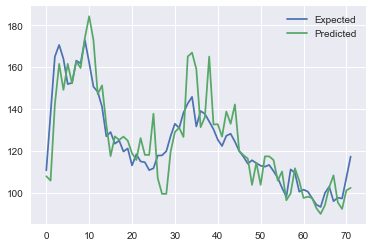

In [55]:
pyplot.plot(y, label='Expected')
pyplot.plot(pred, label='Predicted')
pyplot.legend()
pyplot.show()